In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats



# Porównanie z normą

## Model 1


In [17]:
def model_1(mean, variance, tested_mean, N, alpha, type="two-sided"):
    test_stat = (mean - tested_mean) * N ** (1/2) / variance ** (1/2)

    if type == "two-sided":
        lb = scipy.stats.norm.ppf(0.05/2)
        ub = -scipy.stats.norm.ppf(0.05/2)
        p_value = 2 - 2 * scipy.stats.norm.cdf(test_stat)
    elif type == "left-sided":
        lb = scipy.stats.norm.ppf(0.05)
        p_value = scipy.stats.norm.cdf(test_stat)
    elif type == "right-sided":
        lb = - scipy.stats.norm.ppf(0.05)
        p_value = 1 - scipy.stats.norm.cdf(test_stat)

    return [test_stat, p_value] 



model_1(1025, 2500, 1000, 25, 0.05)


[2.5, 0.012419330651552318]

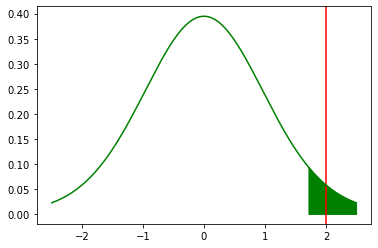

In [61]:
def one_sample_t_test(pop_mean, variance, tested_mean, N, alpha=0.05, type="two-sided"):
    
    test_stat = (pop_mean - tested_mean) * N ** (1/2) / variance ** (1/2)
    dof = N - 1
    x = np.linspace(scipy.stats.t.ppf(0.01, dof), scipy.stats.t.ppf(0.99, dof), 1000)
    fig = plt.figure()
    plt.axvline(x=test_stat, color="r")

    if type == "two-sided":
        lb = scipy.stats.t.ppf(alpha/2, dof)
        ub = -scipy.stats.t.ppf(alpha/2, dof)
        p_value = 2 - 2 * scipy.stats.t.cdf(test_stat, dof)


        plt.plot(x, scipy.stats.t.pdf(x, dof), color = 'green')

        px3 = np.arange(min(x), lb, 0.01)
        plt.fill_between(px3, scipy.stats.t.pdf(px3, dof), color = 'blue')

        px4 = np.arange(ub, max(x), 0.01)
        plt.fill_between(px4, scipy.stats.t.pdf(px4, dof), color = 'blue')

    elif type == "left-sided":
        lb = scipy.stats.t.ppf(alpha, dof)
        p_value = scipy.stats.t.cdf(test_stat, dof)


        plt.plot(x, scipy.stats.t.pdf(x, dof), color = 'green')
        px4 = np.arange(min(x), lb, 0.01)
        plt.fill_between(px4, scipy.stats.t.pdf(px4, dof), color = 'green')

    elif type == "right-sided":
        ub = - scipy.stats.t.ppf(alpha, dof)
        p_value = 1 - scipy.stats.t.cdf(test_stat, dof)
        
        
        plt.plot(x, scipy.stats.t.pdf(x, dof), color = 'green')
        px3 = np.arange(ub, max(x), 0.01)
        plt.fill_between(px3, scipy.stats.t.pdf(px3, dof), color = 'green')


    return [test_stat, p_value, fig] 



one_sample_t_test(250, 2500, 230, 25, type="right-sided")
plt.show()

In [53]:
px3 = np.arange(lb, min(x), 0.01)

NameError: name 'lb' is not defined

In [12]:
1-scipy.stats.norm.cdf(2.5)

0.006209665325776159